### Hamoye Stage C Tag Along Code

### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as ltb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Dataset Description


Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demand-driven electricity production. For future grids with a high share of inflexible (i.e., renewable) energy sources, the concept of demand response is a promising solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classification model to predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.



It has 12 primary predictive features and two dependent variables.

Predictive features:

- 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2' to 'tau4' to the consumer nodes);
- 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
- 'g1' to 'g4': price elasticity coefficient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node, 'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');

Dependent variables:

- 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
- 'stabf': a categorical (binary) label ('stable' or 'unstable').

Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, y_train) and the test set (x_test). Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set. Answer the following questions:

### Loading the Dataset

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


#### Checking for missing values

In [3]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

### Creating our feature matrix

In [4]:
df_new = df.drop(['stab'], axis=1)
df_new

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


In [5]:
# Features
X = df_new.drop(['stabf'], axis = 1)
y = df_new['stabf']

#### Splitting The Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Scaling the Data with Standard scaler

In [7]:
scaler = StandardScaler()
# Training set
scaled_train_df = scaler.fit_transform(X_train)
scaled_train_df = pd.DataFrame(scaled_train_df, columns=X_train.columns)

# Testing Set
X_test = X_test.reset_index(drop=True)
scaled_test_df = scaler.transform(X_test)
scaled_test_df = pd.DataFrame(scaled_test_df, columns=X_test.columns)

### Fitting the Models

#### Random Forest Model

In [8]:
random_fr = RandomForestClassifier(random_state=1)
random_fr.fit(scaled_train_df, y_train)
y_pred_rf = random_fr.predict(scaled_test_df)

#### Extra Trees Classifier

In [9]:
extra_tree = ExtraTreesClassifier(random_state=1)
extra_tree.fit(scaled_train_df, y_train)
y_pred_extr = random_fr.predict(scaled_test_df)

#### XGBoost Model

In [10]:
xg_model = xgb.XGBClassifier(random_state=1)
xg_model.fit(scaled_train_df, y_train)
y_pred_xg = xg_model.predict(scaled_test_df)

[13:10:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Light Gradient Boost Model

In [11]:
lightg_model = ltb.LGBMClassifier(random_state=1)
lightg_model.fit(scaled_train_df, y_train)
y_pred_light = lightg_model.predict(scaled_test_df)

###  Answers to the Questions involving coding

#### Question 1

In [12]:
# Accuracy of the test set using XGBoost classifier
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f'Accuracy of the test set using XGBoost is: {round(accuracy_xg, 4)}')

Accuracy of the test set using XGBoost is: 0.9455


#### Question 8

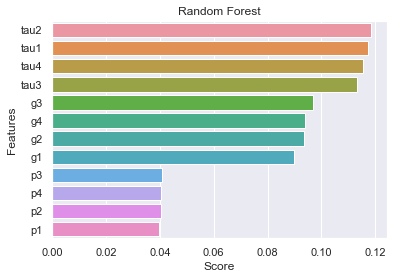

In [13]:
# Feature Importance using ExtraTreesClassifier. Most important and least important
feature_imp = pd.Series(extra_tree.fit(scaled_train_df, y_train).feature_importances_,
                        index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title("Random Forest")
plt.show()

The highest and lowest features were 'tau2' and 'p1' respectively

#### Question 11

In [14]:
# Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy',
# n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

from sklearn.model_selection import RandomizedSearchCV


In [15]:
# Defining the Parameters
max_features = ['auto', 'sqrt','None']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

parameters = {'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'n_estimators' : sp_randInt(100, 1000),
             }

In [16]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(estimator = extra_tree, param_distributions = parameters, n_iter=10,  cv = 5, verbose=1, n_jobs = -1,
                                  random_state=1, scoring='accuracy')

In [17]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'None'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B051CC0BB0>},
                   random_state=1, scoring='accuracy', verbose=1)

In [18]:
# THe best parameters are
clf.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 929}

#### Question 16

In [19]:
# Initial accuracy
accuracy_ex_init = accuracy_score(y_test, y_pred_extr)
print(f'The initial accuracy score is: {round(accuracy_ex_init, 4)}')

The initial accuracy score is: 0.929


In [20]:
# Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). 
# Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter 
# tuning?

# Accuracy of the test set using New Hyperparameters from RandomizedSearchCv
new_random_fr = ExtraTreesClassifier(random_state=1, n_estimators=929, min_samples_split=5, min_samples_leaf=2,
                                      max_depth=4, max_features='sqrt')
new_random_fr.fit(scaled_train_df, y_train)
y_pred_new = random_fr.predict(scaled_test_df)
accuracy_ex_new = accuracy_score(y_test, y_pred_new)
print(f'The tuned accuracy score is: {round(accuracy_ex_new, 4)}')

The tuned accuracy score is: 0.929


#### Question 18

In [21]:
# What is the accuracy on the test set using the random forest classifier? In 4 decimal places.
accuracy_rf_init = accuracy_score(y_test, y_pred_rf)
print(f'The accuracy score for random forest is: {round(accuracy_rf_init, 4)}')

The accuracy score for random forest is: 0.929


#### Question 19

In [22]:
# What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.
accuracy_lightgb = accuracy_score(y_test, y_pred_light)
print(f'The accuracy score of lightgb is: {round(accuracy_lightgb, 4)}')

The accuracy score of lightgb is: 0.9395
